In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:

df =pd.read_csv('TINPLATE.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,151.000000,157.399994,151.000000,155.750000,155.750000,541982
1,2020-01-22,156.949997,157.899994,152.699997,153.649994,153.649994,332591
2,2020-01-23,153.899994,155.800003,153.000000,153.750000,153.750000,234407
3,2020-01-24,154.750000,156.250000,152.500000,153.050003,153.050003,316960
4,2020-01-27,152.000000,152.850006,150.100006,150.300003,150.300003,228269


In [3]:
# Create the list / X and Y data sets
dates = []
prices = []

In [4]:
# Get the number of rows and columns in the data set
df.shape

(22, 7)

In [5]:
# Get the last row of the data (This will be the data that we test on)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2020-02-19,134.800003,143.399994,134.100006,139.25,139.25,608585


In [6]:
# Get all of the data except for the last rows
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,151.000000,157.399994,151.000000,155.750000,155.750000,541982
1,2020-01-22,156.949997,157.899994,152.699997,153.649994,153.649994,332591
2,2020-01-23,153.899994,155.800003,153.000000,153.750000,153.750000,234407
3,2020-01-24,154.750000,156.250000,152.500000,153.050003,153.050003,316960
4,2020-01-27,152.000000,152.850006,150.100006,150.300003,150.300003,228269
5,2020-01-28,150.149994,152.000000,145.750000,146.300003,146.300003,321738
6,2020-01-29,147.250000,149.850006,146.550003,147.000000,147.000000,297889
7,2020-01-30,149.800003,150.000000,145.250000,146.750000,146.750000,331942
8,2020-01-31,146.500000,148.100006,142.250000,142.750000,142.750000,158882
9,2020-02-03,135.000000,136.800003,132.149994,132.899994,132.899994,204801


In [7]:
# The new shape of the data
df.shape

(21, 7)

In [8]:
# Get all of the rows from the Date column
df_dates = df.loc[:, 'Date']

# Get all of the rows from the open column
df_open =df.loc[:,'Open']

In [9]:
# Create thr independent data set X
for date in df_dates:
    dates.append([int(date.split('-')[2])])
    
# Create thr dependent data set Y
for open_price in df_open:
    prices.append(float(open_price))

In [10]:
# See what days were recorded
print(dates)

[[21], [22], [23], [24], [27], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18]]


In [11]:
def predict_prices(dates,prices,x):
    
    #Create the 3 Support Vector Regression models
    svr_lin =SVR(kernel='linear',C=1e3)
    svr_poly =SVR(kernel='poly',C=1e3, degree=2)
    svr_rbf =SVR(kernel='rbf',C=1e3,gamma =0.1)
    
    # Train the SVR models
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    # Create the linear Regression models
    lin_reg =LinearRegression()
    
    # Train the Linear Regression models
    lin_reg.fit(dates,prices)
    
    # plot the models on a graph to see which has the best fit
    plt.scatter(dates,prices,color ='black',label='Data')
    plt.plot(dates,svr_rbf.predict(dates),color ='red',label= 'SVR RBF')
    plt.plot(dates,svr_poly.predict(dates),color ='blue',label= 'SVR POLY')
    plt.plot(dates,svr_lin.predict(dates),color ='orange',label= 'SVR LINEAR')
    plt.plot(dates,lin_reg.predict(dates),color ='green',label= 'LINEAR REGRESSION')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


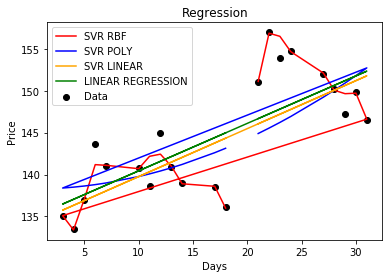

(135.45099922509752, 144.90434417369067, 143.6877987546858, 145.535789034128)


In [14]:
# predict the price  of Tinplate on day 19
predicted_price =predict_prices(dates,prices,[[19]])
print(predicted_price)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


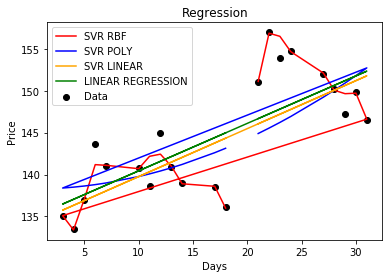

(136.00012140585994, 144.33260530450605, 143.1312947435316, 144.9698437223851)


In [15]:
predicted_price =predict_prices(dates,prices,[[18]])
print(predicted_price)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


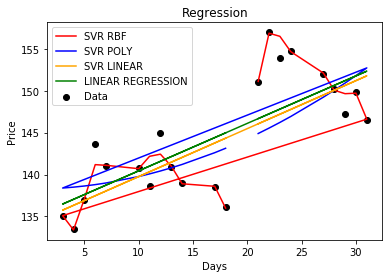

(141.4174071915326, 145.4760830435738, 144.27438421677914, 146.1017343458709)


In [17]:
predicted_price =predict_prices(dates,prices,[[20]])
print(predicted_price)